<a href="https://colab.research.google.com/github/Styler10/ML2025/blob/main/Prac_2_Vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error, confusion_matrix

In [156]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-depression-dataset' dataset.
Path to dataset files: /kaggle/input/student-depression-dataset


id
Уникальный идентификатор, присвоенный каждой записи о студенте в наборе данных.

Gender
Пол студента (например, Мужской, Женский, Другой). Помогает в анализе гендерно-специфических тенденций в области психического здоровья.

Age
Возраст студента в годах.

City
Город или регион проживания студента, предоставляющие географический контекст для анализа.

Profession
Область работы или учебы студента, что может дать понимание факторов стресса, связанных с профессией или учебой.

Academic Pressure
Показатель уровня давления, которое испытывает студент в учебной среде. Включает стресс от экзаменов, заданий и общих академических ожиданий.

Work Pressure
Показатель давления, связанного с работой или служебными обязанностями. Важно для студентов, которые совмещают работу и учебу.

CGPA
Кумулятивный средний балл студента, отражающий общую успеваемость.

Study Satisfaction
Показатель удовлетворенности студента учебой, который может коррелировать с психическим благополучием.

Job Satisfaction
Показатель удовлетворенности работой или условиями труда студента, если это применимо.

Sleep Duration
Среднее количество часов сна студента в сутки, важный фактор для психического здоровья.

Dietary Habits
Оценка пищевых привычек и рациона студента, что может влиять на общее состояние здоровья и настроение.

Degree
Академическая степень или программа, которую студент изучает.

Have you ever had suicidal thoughts ?
Двоичный индикатор (Да/Нет), отражающий, испытывал ли студент когда-либо суицидальные мысли.

Work/Study Hours
Среднее количество часов в день, которое студент посвящает работе или учебе, что может влиять на уровень стресса.

Financial Stress
Показатель стресса, вызванного финансовыми проблемами, что может сказываться на психическом здоровье.

Family History of Mental Illness
Указывает, есть ли в семье история психических заболеваний (Да/Нет), что является важным фактором предрасположенности к психическим проблемам.

Depression
Целевая переменная, показывающая, испытывает ли студент депрессию (Да/Нет). Основной фокус анализа.

In [157]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## EDA

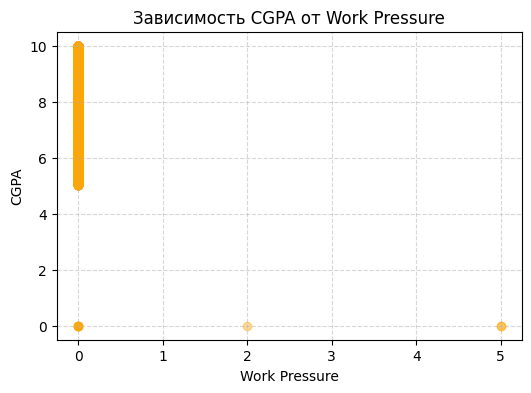

In [159]:
plt.figure(figsize=(6,4))
plt.scatter(df['Work Pressure'], df['CGPA'], alpha=0.4, color='orange')
plt.title('Зависимость CGPA от Work Pressure')
plt.xlabel('Work Pressure')
plt.ylabel('CGPA')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/tmp/ipython-input-1517495972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Study Satisfaction', y='CGPA', data=df, inner='box', palette='muted')


Text(0, 0.5, 'CGPA')

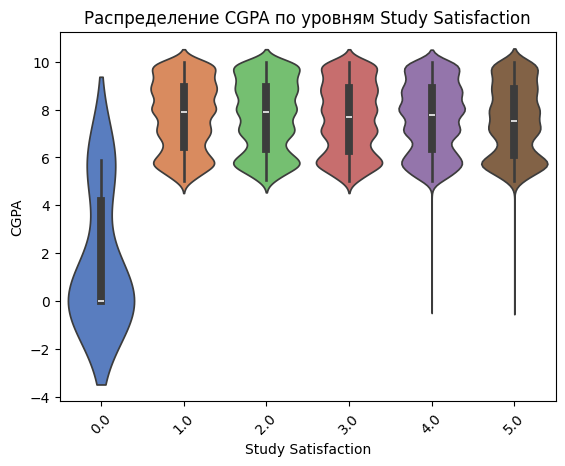

In [160]:
sns.violinplot(x='Study Satisfaction', y='CGPA', data=df, inner='box', palette='muted')
plt.title('Распределение CGPA по уровням Study Satisfaction')
plt.xlabel('Study Satisfaction')
plt.xticks(rotation=45)
plt.ylabel('CGPA')

/tmp/ipython-input-1388120452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='CGPA', data=df, palette='Set2')


Text(0, 0.5, 'CGPA')

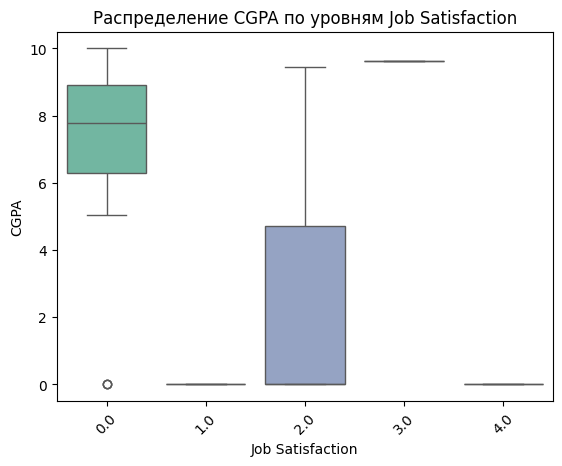

In [161]:
sns.boxplot(x='Job Satisfaction', y='CGPA', data=df, palette='Set2')
plt.title('Распределение CGPA по уровням Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.ylabel('CGPA')

### Зависимости

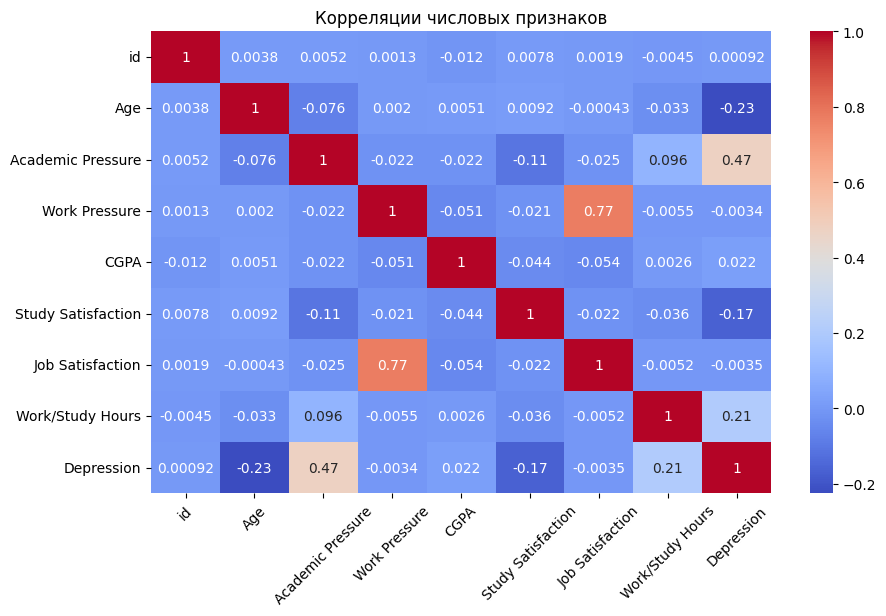

In [162]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Корреляции с CGPA:

Age (0.0051) - Очень слабая положительная связь. Возраст практически не влияет.

Academic Pressure (-0.022) - Очень слабая отрицательная связь

Work Pressure (-0.0051) - Почти нулевая корреляция

Study Satisfaction (-0.044) - Слабая отрицательная связь

Job Satisfaction (-0.054) - Слабая отрицательная связь

Work/Study Hours (0.0026) - Почти нулевая связь

Depression (0.022) - Очень слабая положительная связь

In [163]:
best_features1 = ["Depression", "Job Satisfaction", "Academic Pressure", "Study Satisfaction"]

### Пропуски

In [164]:
df.isnull().sum().sum()

np.int64(0)

### Типы данных

In [165]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)

categorial_features

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Financial Stress',
 'Family History of Mental Illness']

In [166]:
df[categorial_features]

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,1.0,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,2.0,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,1.0,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,5.0,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,1.0,No
...,...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,1.0,Yes
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,3.0,Yes
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,2.0,No
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,5.0,No


In [167]:
for i in categorial_features:
    print(f"Unique for {i}: {df[i].unique()}\n")

Unique for Gender: ['Male' 'Female']

Unique for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Unique for Profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Unique for Sleep Duration: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']

Unique for Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Unique for Degr

Unique for Financial Stress: ['1.0' '2.0' '5.0' '3.0' '4.0' '?'] - Опана

In [168]:
print((df['Financial Stress'] == '?').sum())

3


In [169]:
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [171]:
categorial_features = list(df.select_dtypes(include=['object']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

In [172]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]#2знач
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]#остальное

In [173]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [174]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

In [175]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_'Less Delhi',City_'Less than 5 Kalyan',City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [177]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
df.isnull().sum().sum()

np.int64(0)

In [179]:
scaler = StandardScaler()
df[numeric_features[1:]] = scaler.fit_transform(df[numeric_features[1:]])

In [180]:
X = df.drop("CGPA", axis=1)
y = df["CGPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_best = df[best_features1]

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.33, random_state=42)

In [181]:
def graph_coef(coefs, feature_names):

    sns.barplot(coefs, feature_names, orient="h")
    plt.xlabel('Коэффициенты')
    plt.show()

In [182]:
def metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('MAE %.3f' % mae)
    print('R2=%.3f' % r2)
    print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (mape, mape * 100, '%'))
    print('MSE=%.3f' % mse)
    print('RMSE=%.3f' % rmse)

In [183]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [184]:
y_pred1 = model1.predict(X)

In [186]:
metrics(y, y_pred1)

MAE 0.851
R2=0.026
MAPE=1.081, MAPE_as_percent=108.088%
MSE=0.974
RMSE=0.987


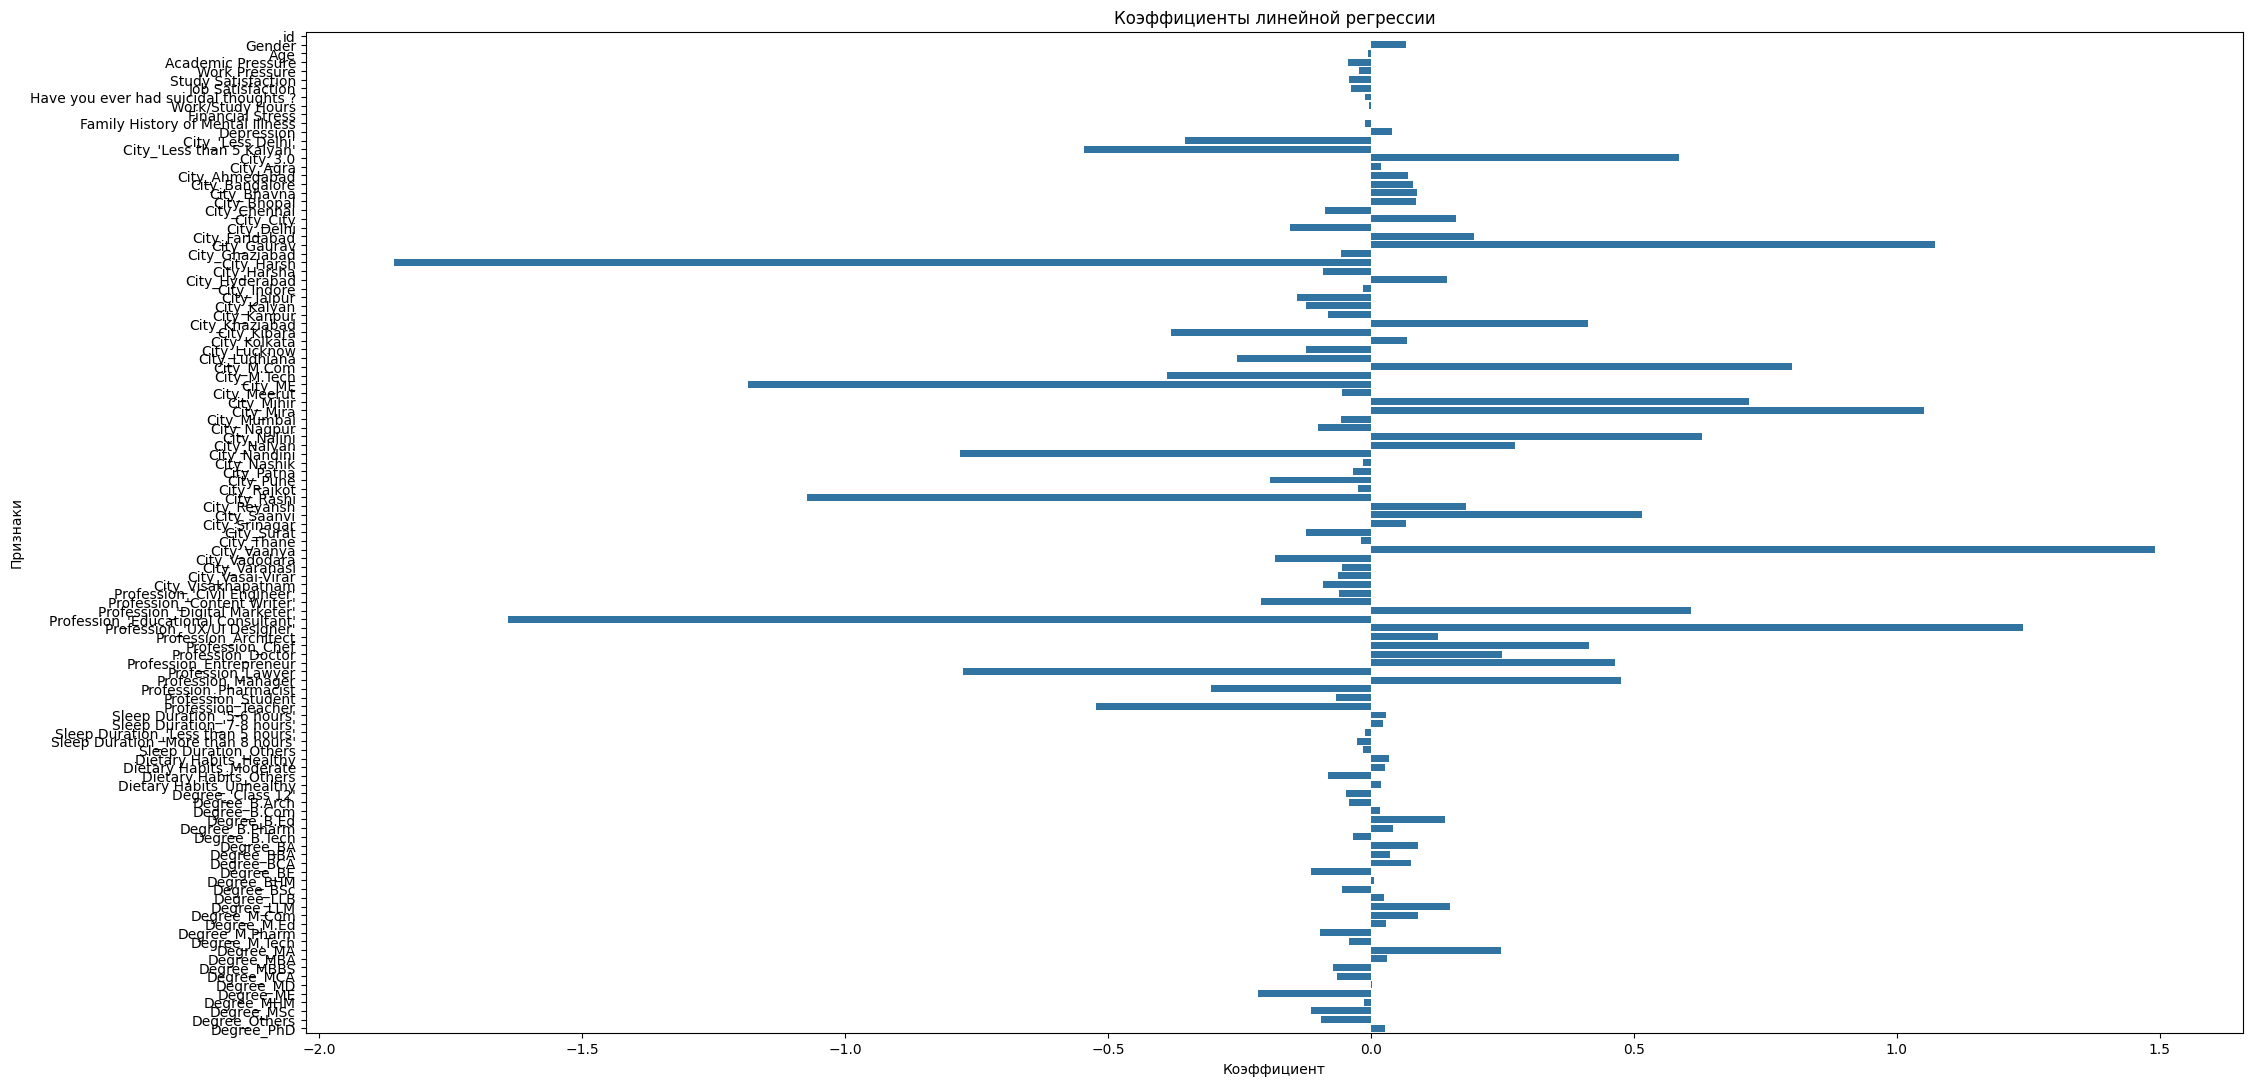

In [204]:
plt.figure(figsize=(25,13))
sns.barplot(x=model1.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [188]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [189]:
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

In [190]:
metrics(y_train, y_train_pred2)

MAE 0.847
R2=0.027
MAPE=1.090, MAPE_as_percent=109.029%
MSE=0.967
RMSE=0.984


In [191]:
metrics(y_test, y_test_pred2)

MAE 0.859
R2=0.016
MAPE=1.092, MAPE_as_percent=109.186%
MSE=0.995
RMSE=0.997


Исходя из метрик всё плохо

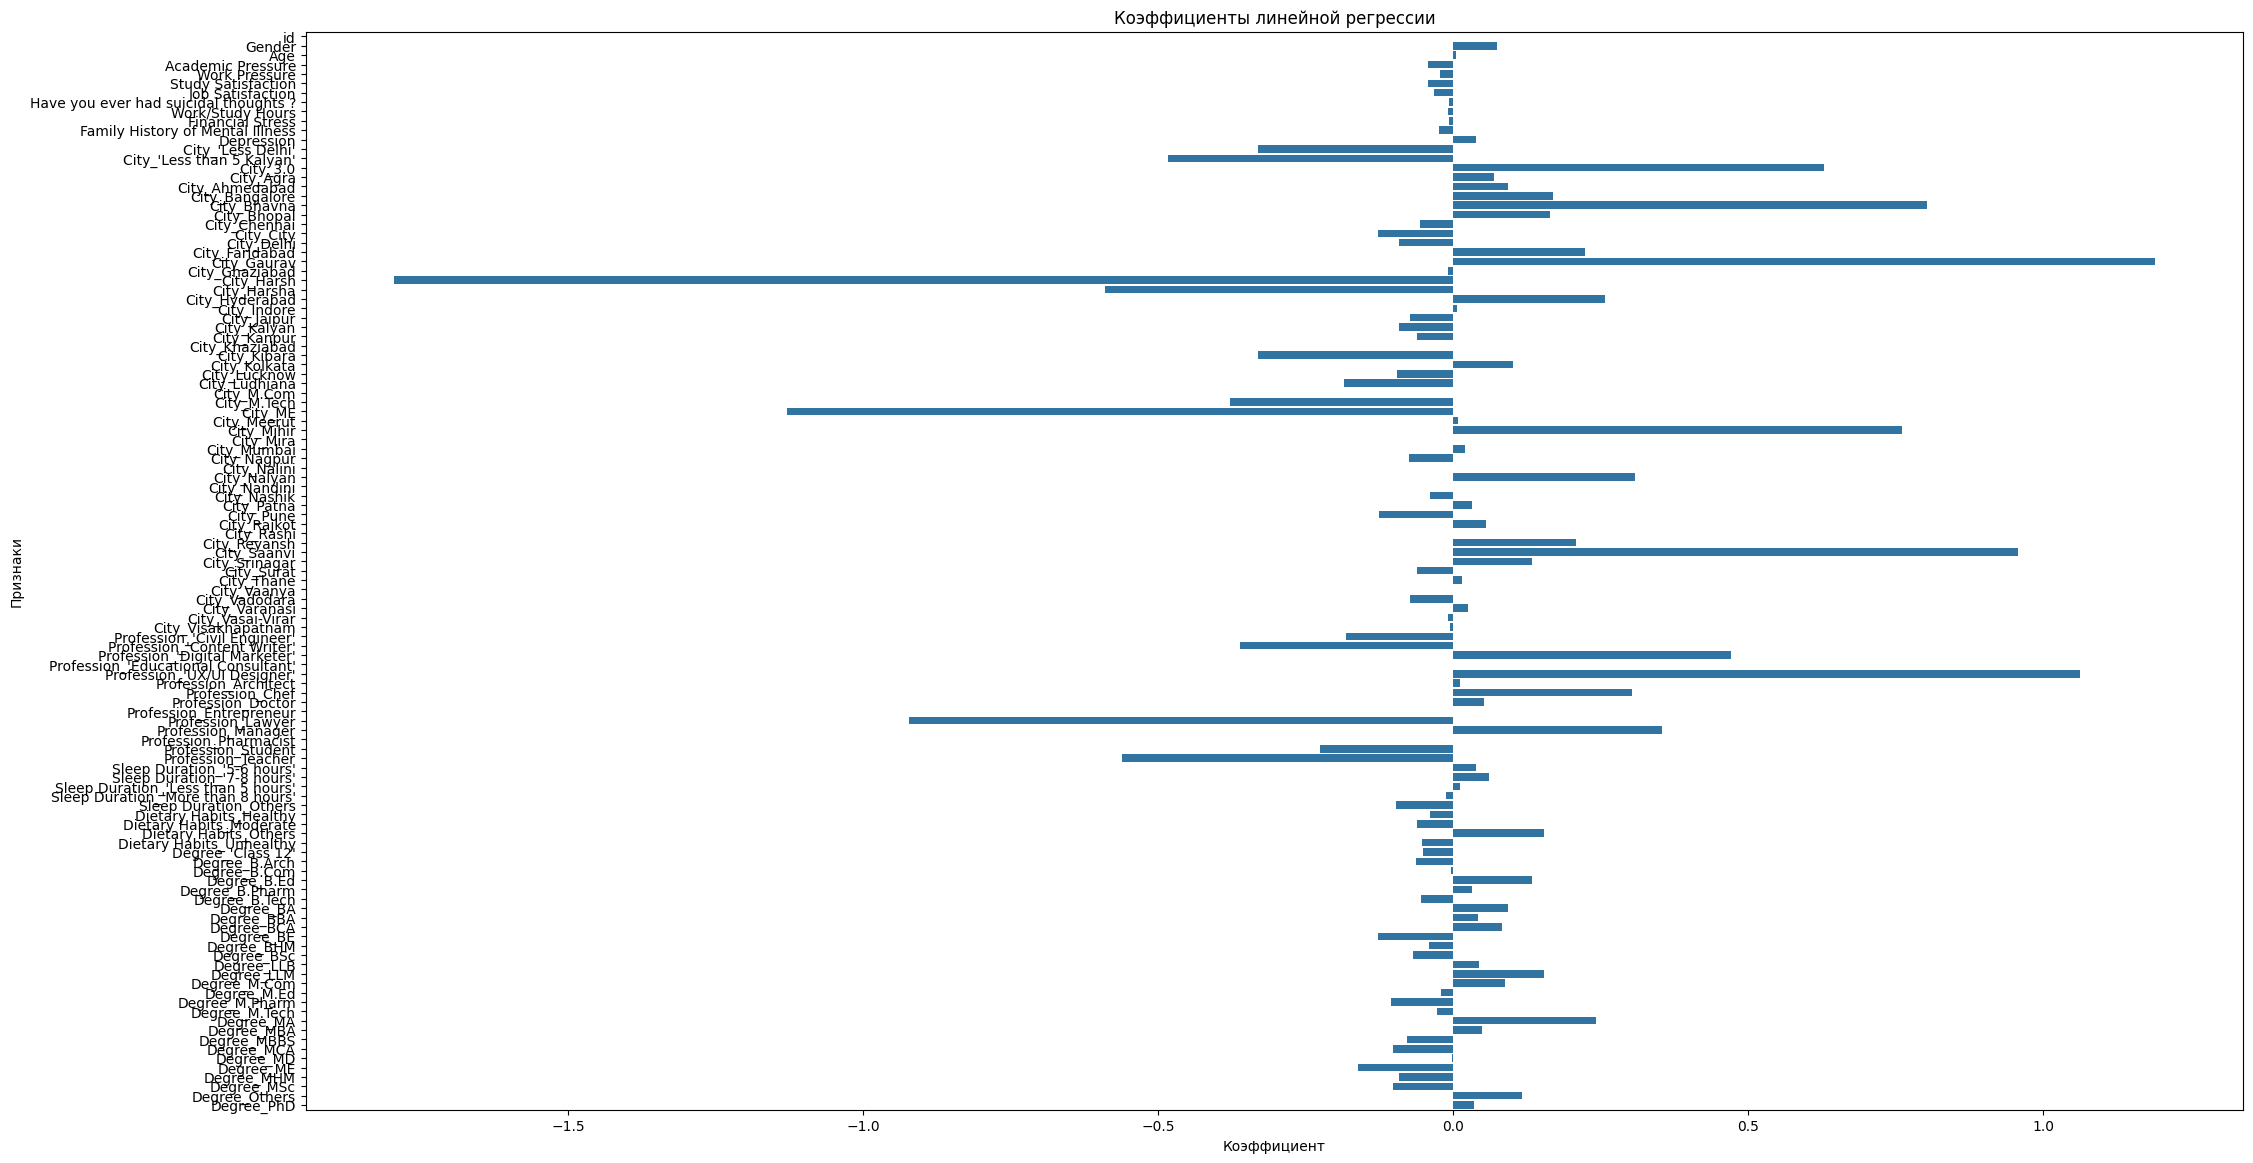

In [205]:
plt.figure(figsize=(25,14))
sns.barplot(x=model2.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [193]:
model3 = LinearRegression()
model3.fit(X_best, y)

LinearRegression()

In [194]:
y_pred3 = model3.predict(X_best)

In [195]:
metrics(y, y_pred3)

MAE 0.863
R2=0.007
MAPE=1.025, MAPE_as_percent=102.545%
MSE=0.993
RMSE=0.997


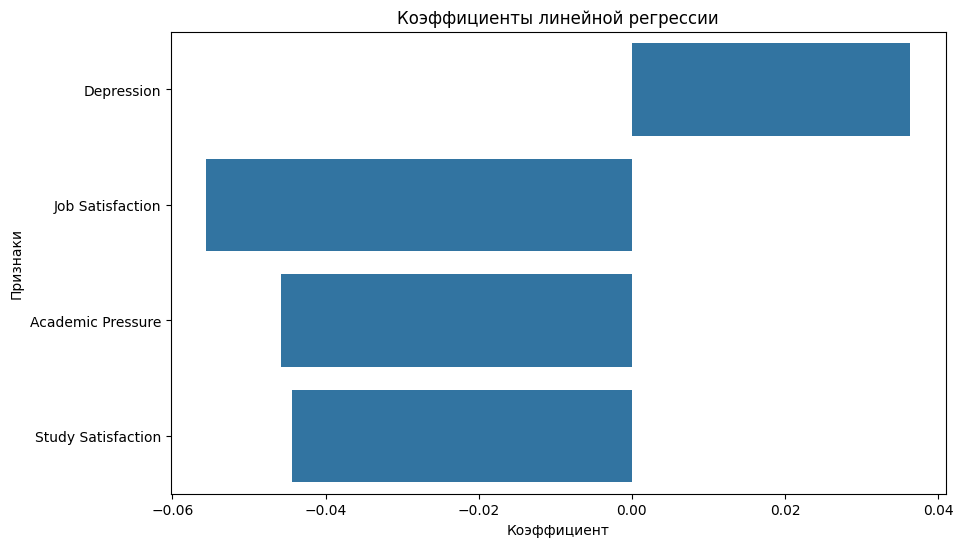

In [196]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

In [197]:
model4 = LinearRegression()
model4.fit(X_train_best, y_train_best)

LinearRegression()

In [198]:
y_pred4_train = model4.predict(X_train_best)

y_pred4_test = model4.predict(X_test_best)

In [199]:
metrics(y_train_best, y_pred4_train)

MAE 0.861
R2=0.005
MAPE=1.024, MAPE_as_percent=102.376%
MSE=0.989
RMSE=0.994


In [200]:
metrics(y_test_best, y_pred4_test)

MAE 0.866
R2=0.009
MAPE=1.024, MAPE_as_percent=102.407%
MSE=1.002
RMSE=1.001


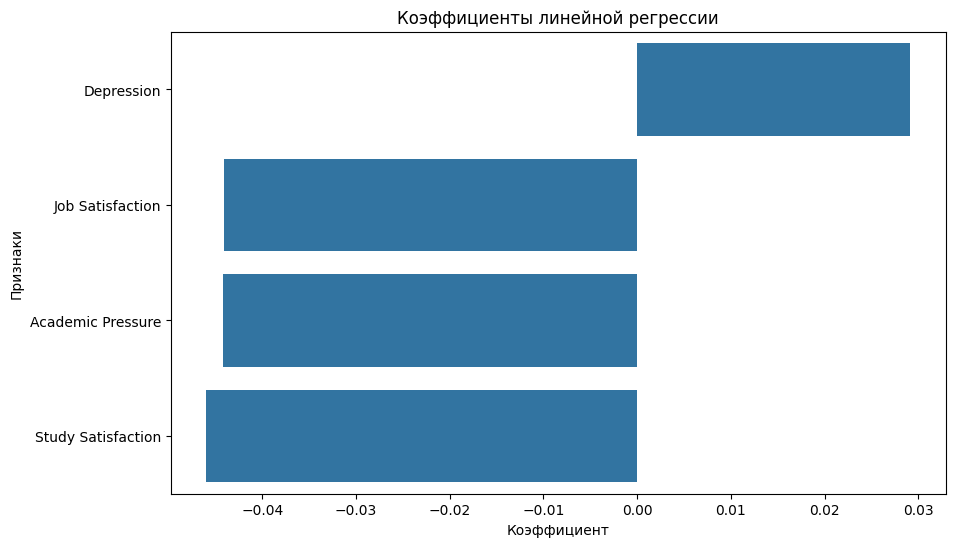

In [201]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X_train_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()